# 下載darknet儲存庫

In [14]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


# 修改 Makefile 裡的參數

In [15]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


## 生成學習引擎

In [16]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
   

# 預先測試darknet是否正常運作

In [17]:
download_from_official = False

if download_from_official:
  # download weights form official
  !wget https://pjreddie.com/media/files/yolov3.weights
  !wget https://pjreddie.com/media/files/darknet53.conv.74
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
else:
  # download weights form Jason Chen's google drive (should be faster)
  !gdown https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN
  !gdown https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb
  !gdown https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A
  !gdown https://drive.google.com/uc?id=1Zl3rh0ZOPVj4DPZdae8WqqZU0NLX7Ncp

Downloading...
From: https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN
To: /content/darknet/yolov3.weights
100% 248M/248M [00:02<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb
To: /content/darknet/darknet53.conv.74
100% 162M/162M [00:00<00:00, 213MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A
To: /content/darknet/yolov4.weights
100% 258M/258M [00:01<00:00, 232MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zl3rh0ZOPVj4DPZdae8WqqZU0NLX7Ncp
To: /content/darknet/yolov4.conv.137
100% 170M/170M [00:00<00:00, 308MB/s]


# 進行預測（並使其呈現）

更換預測圖片可以從darknet的Github中的資料庫(data)尋找並更換

In [18]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

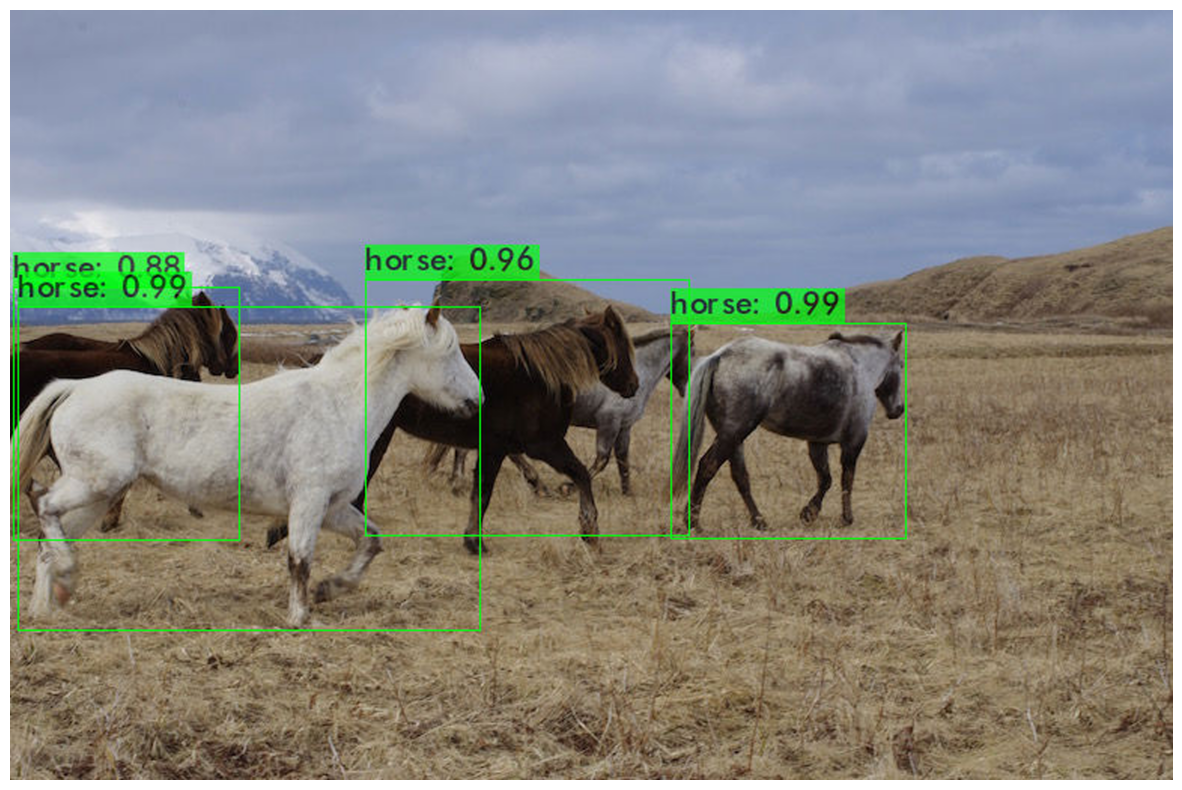

In [20]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg

# show result
imShow('predictions.jpg')